In [69]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
#read csv file
df = pd.read_csv("/Users/noushinahmadvand/Downloads/TeleResponse/dataset/raw_data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [33]:
#print dataframe
print(df)
print(df.columns)
print(df.shape)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [27]:
#load structure overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [26]:
#checking for null values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [34]:
#change totalcharges type to numerical
#df["TotalCharges"] = df["TotalCharges"].str.strip() #remove white space
#df["TotalCharges"] = df["TotalCharges"].replace("", None) #replace empty strings with None


#convert to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')


In [35]:
print(df["TotalCharges"].dtype)

float64


In [36]:
#number of columns
num_column = df.shape[1]
print(num_column)

21


In [37]:
#checking type of each column
for column in df.columns:
    print ({f"{column} has type of {df[column].dtype} and has {df[column].value_counts().sum()} elemnts and has {df[column].isnull().sum()} null value"})


{'customerID has type of object and has 7043 elemnts and has 0 null value'}
{'gender has type of object and has 7043 elemnts and has 0 null value'}
{'SeniorCitizen has type of int64 and has 7043 elemnts and has 0 null value'}
{'Partner has type of object and has 7043 elemnts and has 0 null value'}
{'Dependents has type of object and has 7043 elemnts and has 0 null value'}
{'tenure has type of int64 and has 7043 elemnts and has 0 null value'}
{'PhoneService has type of object and has 7043 elemnts and has 0 null value'}
{'MultipleLines has type of object and has 7043 elemnts and has 0 null value'}
{'InternetService has type of object and has 7043 elemnts and has 0 null value'}
{'OnlineSecurity has type of object and has 7043 elemnts and has 0 null value'}
{'OnlineBackup has type of object and has 7043 elemnts and has 0 null value'}
{'DeviceProtection has type of object and has 7043 elemnts and has 0 null value'}
{'TechSupport has type of object and has 7043 elemnts and has 0 null value'}

In [38]:

#checking number of objcet columns and int columns
num_obj_column = 0
num_int_column = 0  
for column in df.columns:
   
    if df[column].dtype == "object":
        num_obj_column += 1
    if df[column].dtype == "int64":

        num_int_column += 1


print(f"num_obj_column is {num_obj_column} and num_int_column is {num_int_column}")   


num_obj_column is 17 and num_int_column is 2


In [39]:

#checking each columns information
def checking_column_information(column):

    print(f"{column} is of the type of {df[column].dtype}  it's distribution is {df[column].value_counts()}")


In [40]:
#loop over all the column except the first column
for column in df.columns[1:]:
    checking_column_information(column)

gender is of the type of object  it's distribution is gender
Male      3555
Female    3488
Name: count, dtype: int64
SeniorCitizen is of the type of int64  it's distribution is SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
Partner is of the type of object  it's distribution is Partner
No     3641
Yes    3402
Name: count, dtype: int64
Dependents is of the type of object  it's distribution is Dependents
No     4933
Yes    2110
Name: count, dtype: int64
tenure is of the type of int64  it's distribution is tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
PhoneService is of the type of object  it's distribution is PhoneService
Yes    6361
No      682
Name: count, dtype: int64
MultipleLines is of the type of object  it's distribution is MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService is of th

In [41]:
# evaluate revenue based on phone services and gender
df_revenue = df.groupby(["InternetService"])["MonthlyCharges"].sum().reset_index(name = "total_revenue")
print(df_revenue)

  InternetService  total_revenue
0             DSL      140665.35
1     Fiber optic      283284.40
2              No       32166.85


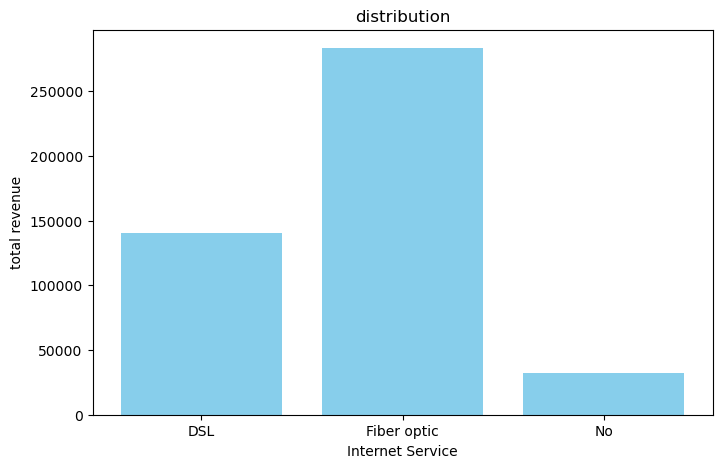

In [42]:

plt.figure(figsize = (8,5))
plt.bar(df_revenue["InternetService"], df_revenue["total_revenue"], color = "skyblue")
#Add labels and titles

plt.xlabel("Internet Service")
plt.ylabel("total revenue")
plt.title("distribution")


#show plot
plt.show()

In [ ]:
df[""]

In [43]:
#check for duplicate
duplicates = df.duplicated()
print(df[duplicates])

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


In [59]:
each_category_count = df["Dependents"].value_counts().to_list()
print(each_category_count[0])

4933


In [57]:
categories = df["Dependents"].unique()
print(categories[1])

Yes


In [61]:
number_category = df["Dependents"].nunique()
print(number_category)

2


In [62]:
df["Dependents"].value_counts().max()

4933

In [63]:
id_category_max = df["Dependents"].value_counts().idxmax()

'No'

In [45]:
# check columns that have imbalanced dataset
for column in df.select_dtypes(include = ["object", "category"]):
   
    if df[column].value_counts().max() >= 2 * df[column].value_counts().min():
        
        print(column)

Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
Contract
Churn


In [79]:
#function for handling unbalanced dataset
def balance_classes(df,column):
    each_category_count = df[column].value_counts().to_list()
    categories_name = df[column].unique()
    number_category = df[column].nunique()

    if number_category == 2:

      majority_classess = df[column].value_counts().max()
      minority_classes = df[column].value_counts().min()
      class_majority_classess = df[column].value_counts().idxmax()
      class_minority_classess = df[column].value_counts().idxmin()


      if majority_classess >= 2 *  minority_classes:
         

         #down sample majority
         df_majority = df[df[column] == class_majority_classess]
         df_minority = df[df[column] == class_minority_classess]

         df_majority_downsampled = resample(df_majority ,replace = False, n_samples= len(df_minority),random_state= 42 )

         df = pd.concat([df_majority_downsampled , df_minority])

         
      
    return df
      
      
         
         


In [81]:
#adressing imbalaned datasets
for column in df.select_dtypes(include = ["object", "category"]):
   df =  balance_classes(df, column)
        



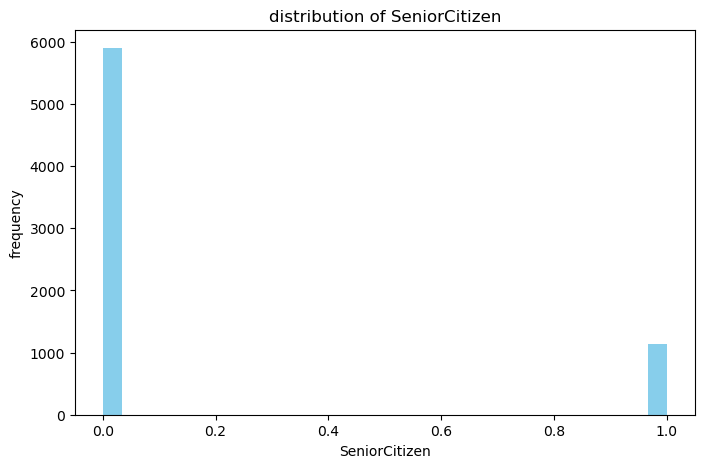

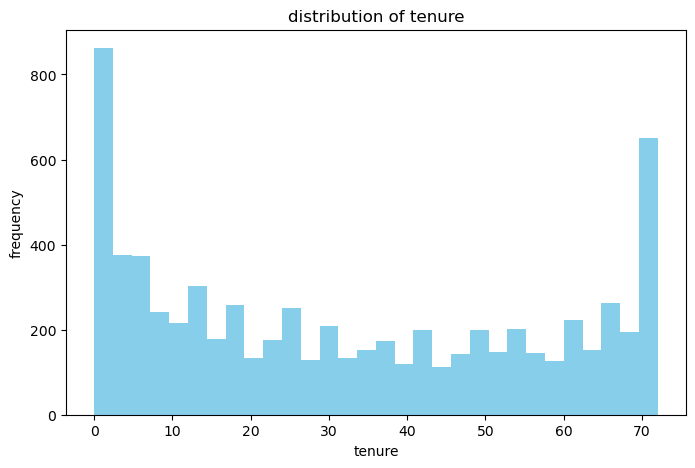

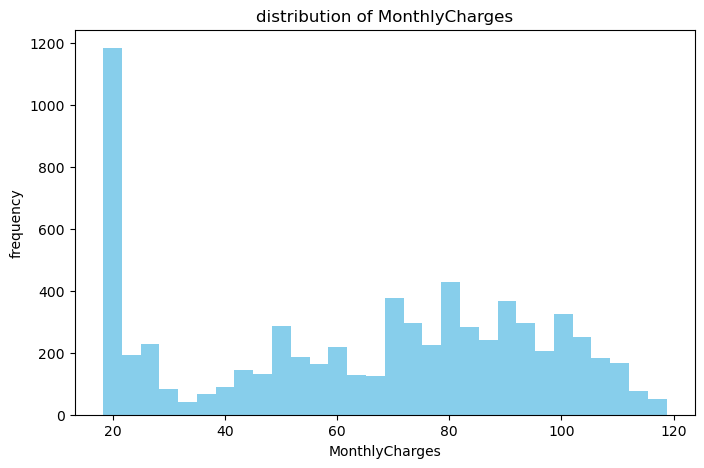

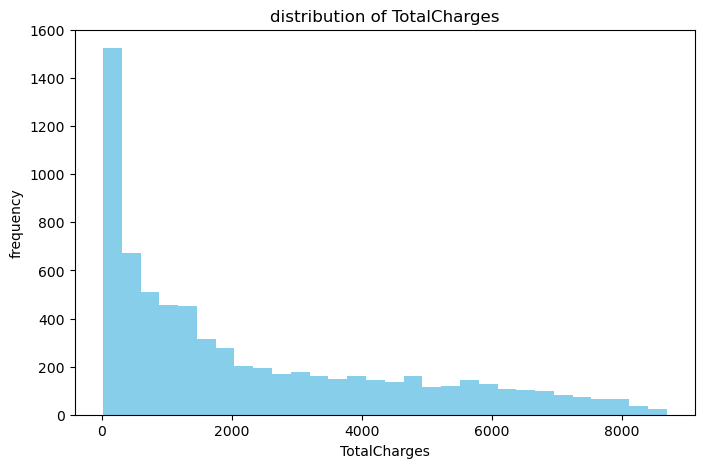

In [46]:
#ploting to evaluate distribution
for column in df.select_dtypes(include=["float64", "int64"]):
    plt.figure(figsize= (8,5))
    plt.hist(df[column], bins = 30, color = "skyblue")
    plt.xlabel(column)
    plt.ylabel("frequency")
    plt.title(f"distribution of {column}")
    plt.show()

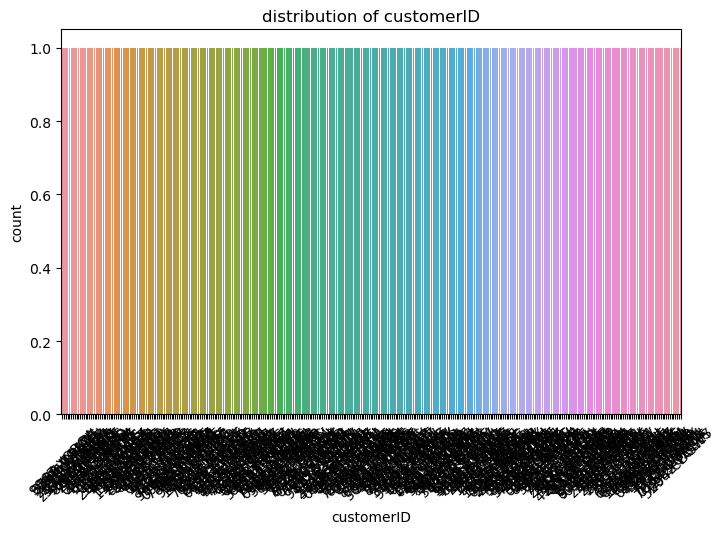

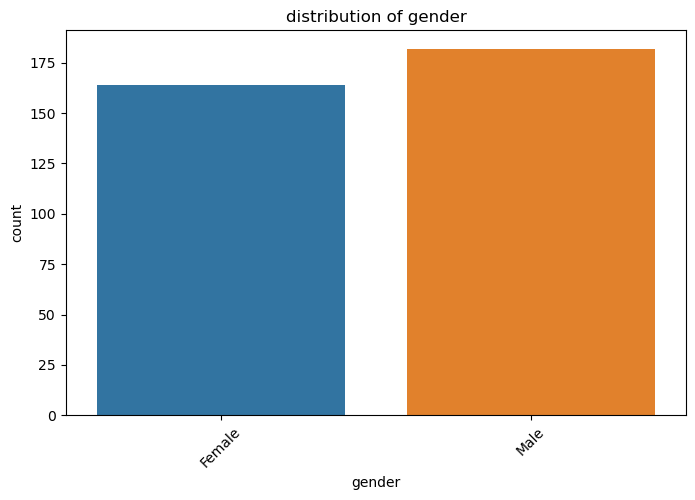

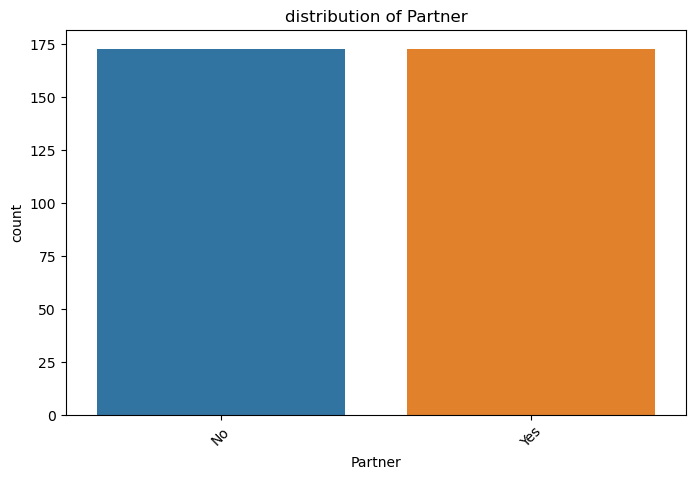

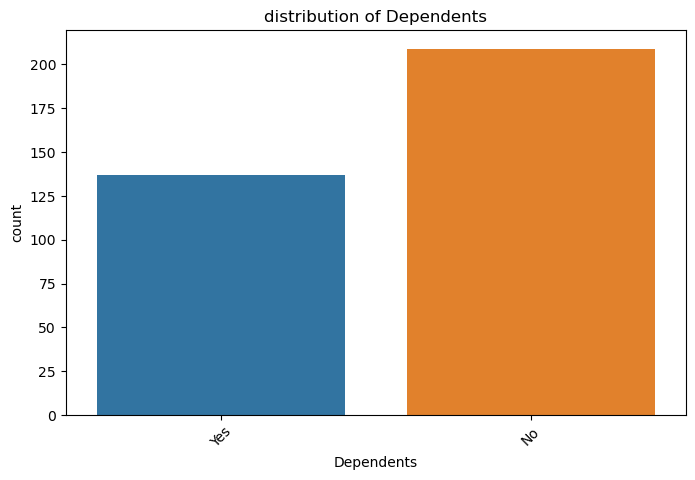

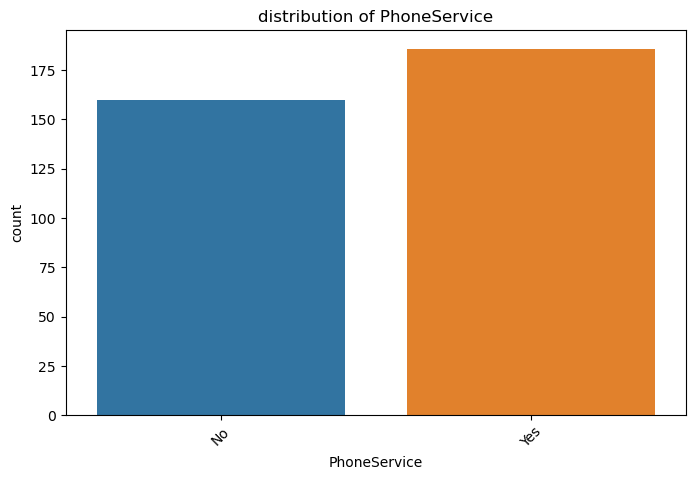

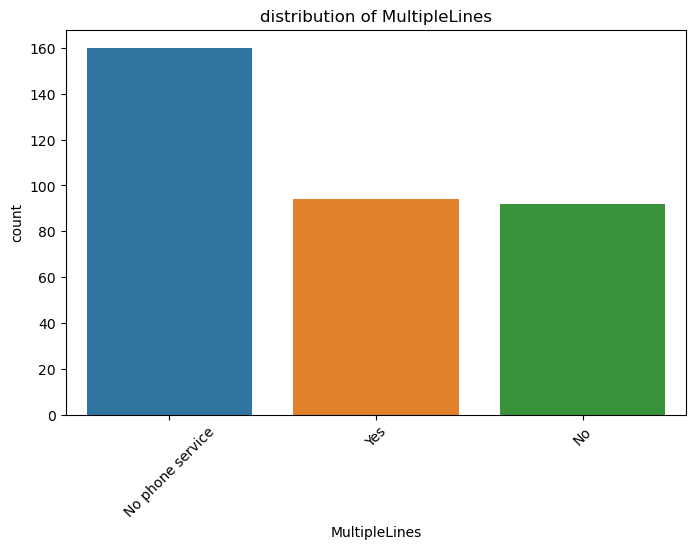

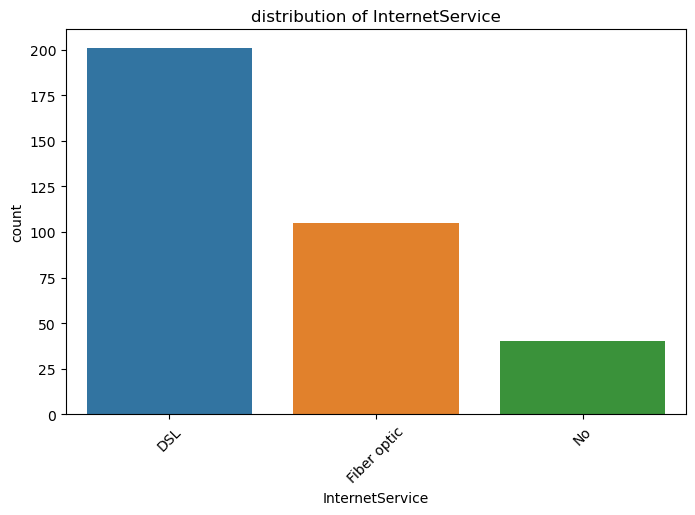

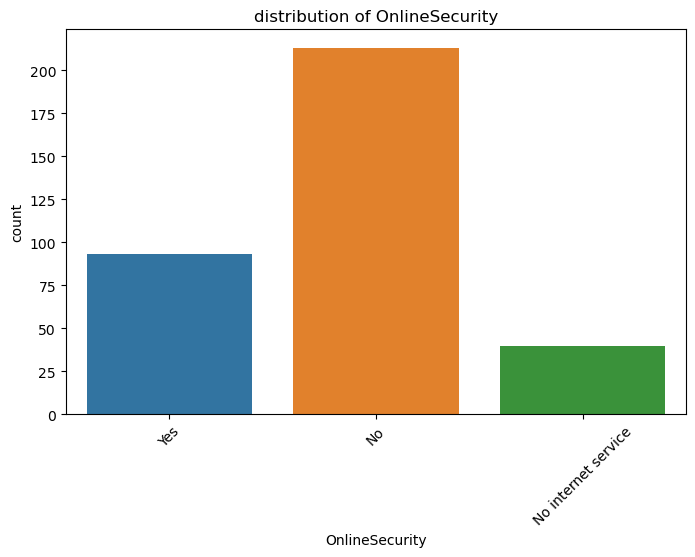

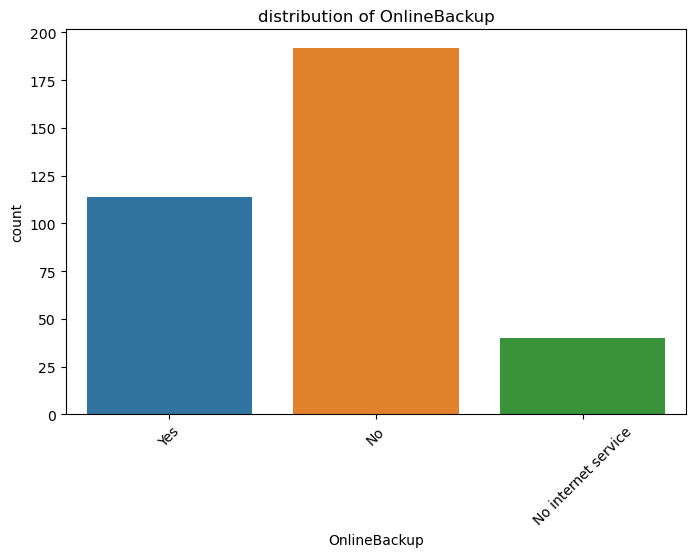

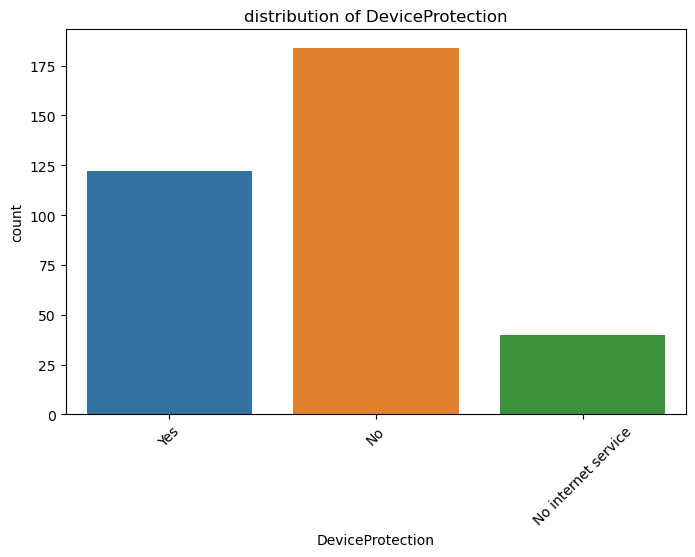

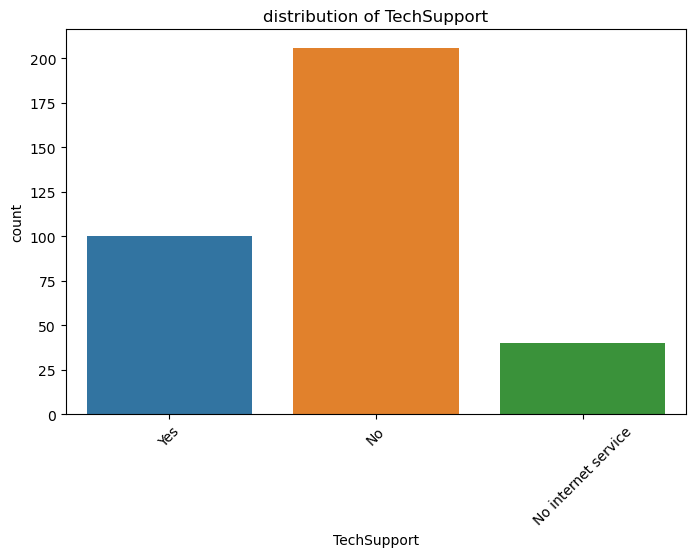

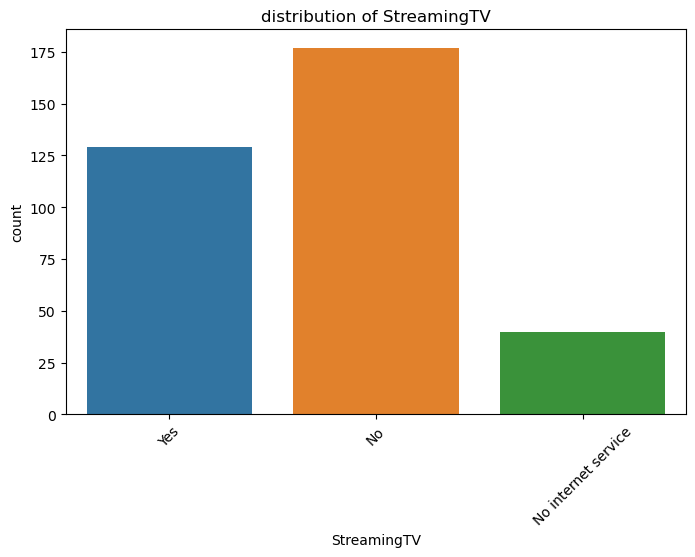

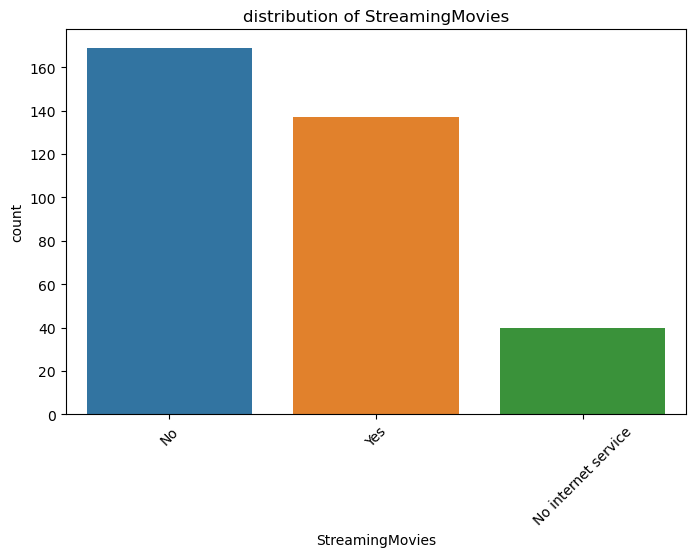

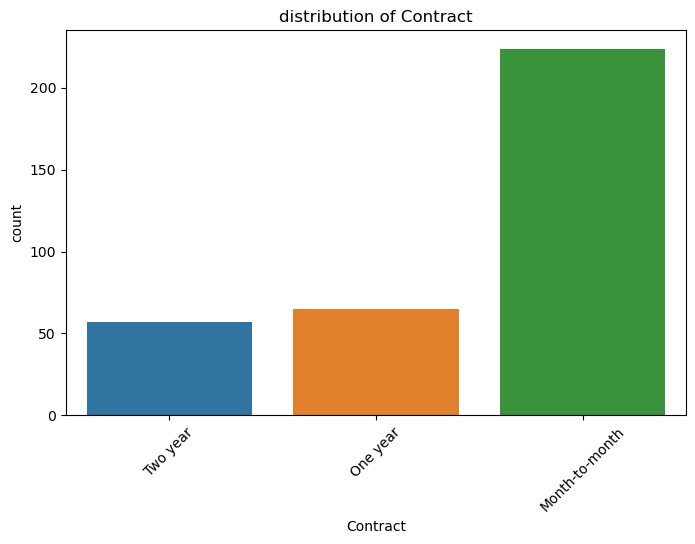

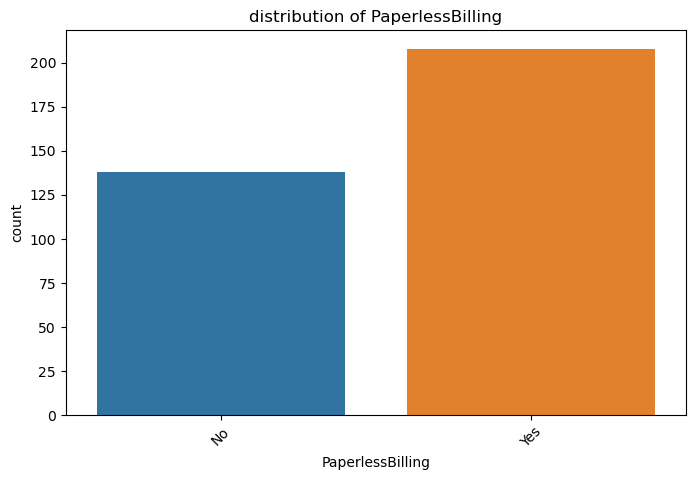

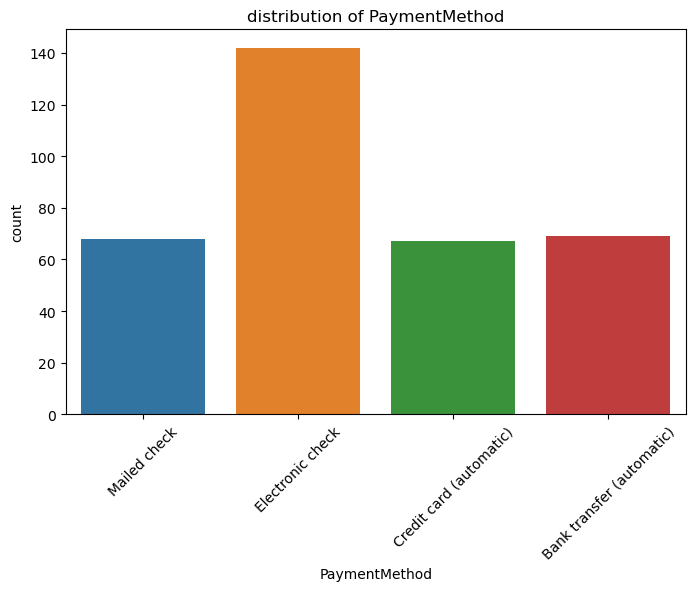

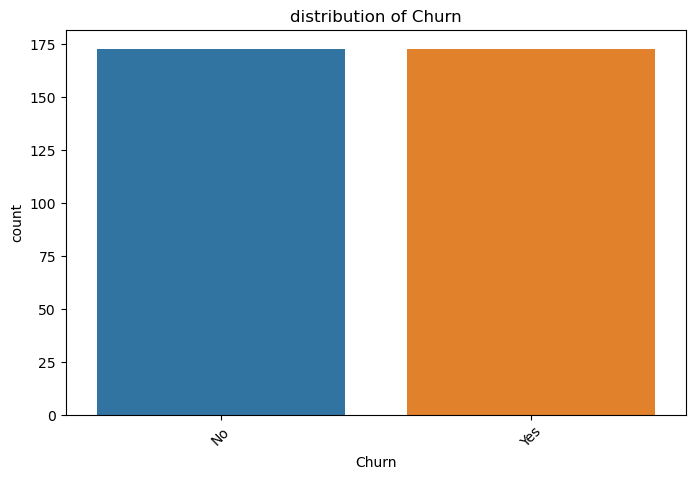

In [82]:
for column in df.select_dtypes(include = ["object", "category"]):
    plt.figure(figsize = (8,5))
    sns.countplot(x= df[column])
    plt.title(f"distribution of {column}")
    plt.xticks(rotation = 45)
    plt.show()